In [ ]:
# !pip install sklearn
from IPython.display import clear_output
import pandas as pd
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_validate
from sklearn.metrics import *

2.4.0


In [ ]:
#load data
data_x,data_y = load_iris(return_X_y=True)
print(data_x[0],data_y[0])
print(data_x[0].shape)
print(data_y.shape)

[5.1 3.5 1.4 0.2] 0
(4,)
(150,)


In [ ]:
#define model
x_1 = keras.Input(shape=(4,))
h1_1 = layers.Dense(6, activation='relu')(x_1)
h2_1 = layers.Dense(5, activation='relu')(h1_1)
# h3_1 = layers.Dense(4, activation='sigmoid')(h2_1)
outputs = layers.Dense(3,activation='softmax')(h2_1)
nn_model = keras.Model(inputs=x_1, outputs=outputs,name='nn_network')
nn_model.summary()
nn_model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

Model: "nn_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_21 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 35        
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 18        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train my own nn_network
kf=KFold(n_splits=5,shuffle=True)
scce = tf.keras.losses.SparseCategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE)
cce = tf.keras.losses.CategoricalCrossentropy()
nn_loss=0
loss=0
acc=0
res=[]
#---
nn_acc_score=0
nn_recall_marco_score=0
nn_recall_mirco_score=0
nn_precision_macro_score=0
nn_precision_micro_score=0
nn_confusion_matrix_sum=np.empty((3,3))
nn_confusion_matrix_sum[:]=0
time=1
#----
for train_index,test_index in kf.split(data_x):
    x_train,x_test=data_x[train_index],data_x[test_index]
    y_train,y_test=data_y[train_index],data_y[test_index]
    hix_train=y_traindel.fit(data_x,data_y,
              batch_size=1, epochs=25, verbose=0,
              validation_data=(x_test,y_test),
            #   validation_split=0.1
              )
    res.append(history)
    y_pred=np.argmax(nn_model.predict(x_test),axis=1)
    tmp_lo,tmp_ac=nn_model.evaluate(x_test,y_test,verbose=1)
    loss+=tmp_lo
    acc+=tmp_ac
    nn_acc_score=nn_acc_score+accuracy_score(y_test,y_pred)
    nn_recall_marco_score=nn_recall_marco_score+recall_score(y_test, y_pred, average='macro')
    nn_recall_mirco_score=nn_recall_mirco_score+recall_score(y_test, y_pred, average='macro')
    nn_precision_macro_score=nn_precision_macro_score+precision_score(y_test, y_pred, average='macro')
    nn_precision_micro_score=nn_precision_micro_score+precision_score(y_test, y_pred, average='micro')
    nn_confusion_matrix_sum=nn_confusion_matrix_sum+confusion_matrix(y_test, y_pred)
    y_test=y_test.astype('float64')
    y_pred=y_pred.astype('float64')
    nn_loss=nn_loss+cce(y_pred,y_test).numpy()
    print('time:',time)
    time=time+1
    print('loss:',cce(y_pred,y_test).numpy())
    print("recall_marco_score:",recall_score(y_test, y_pred, average='macro'))
    print("recall_mirco_score:",recall_score(y_test, y_pred, average='macro'))
    print("precision_macro_score:",precision_score(y_test, y_pred, average='macro'))
    print("precision_micro_score:",precision_score(y_test, y_pred, average='macro'))
    print("confusion_matrix:\n",confusion_matrix(y_test, y_pred))
    # print(pd.crosstab(y_test,y_pred))
    
print('-----------------------------------------')
print('loss_avg:',nn_loss/5)
print('model.evaluate loss:',loss/5, "model.evaluate accuracy:",acc/5)
print("accuracy_score:",nn_acc_score/5)
print("recall_marco_score_avg:",nn_recall_marco_score/5)
print("recall_mirco_score_avg:",nn_recall_mirco_score/5)
print("precision_macro_score_avg:",nn_precision_macro_score/5)
print("precision_micro_score_avg:",nn_precision_micro_score/5)
print("confusion_matrix_avg:\n",nn_confusion_matrix_sum/5)


1/1 [==============================] - 0s 93ms/step - loss: 0.0982 - accuracy: 0.9667
time: 1
loss: 113.18208312988281
recall_marco_score: 0.9583333333333334
recall_mirco_score: 0.9583333333333334
precision_macro_score: 0.9777777777777779
precision_micro_score: 0.9777777777777779
confusion_matrix:
 [[ 8  0  0]
 [ 0  7  1]
 [ 0  0 14]]
1/1 [==============================] - 0s 14ms/step - loss: 0.1196 - accuracy: 0.9333
time: 2
loss: 85.87520599365234
recall_marco_score: 0.9487179487179488
recall_mirco_score: 0.9487179487179488
precision_macro_score: 0.9259259259259259
precision_micro_score: 0.9259259259259259
confusion_matrix:
 [[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
1/1 [==============================] - 0s 16ms/step - loss: 0.0465 - accuracy: 1.0000
time: 3
loss: 82.21137237548828
recall_marco_score: 1.0
recall_mirco_score: 1.0
precision_macro_score: 1.0
precision_micro_score: 1.0
confusion_matrix:
 [[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
1/1 [==============================] - 0s 14ms/step

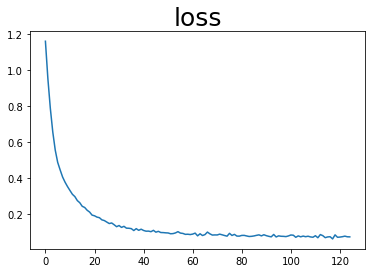

In [ ]:
tmp=res
loss_pic=np.array([])
acc_pic=np.array([])
for i in tmp:
    loss_pic=np.append(loss_pic,np.array(i.history['loss']))
plt.title("loss",fontsize=25,)
plt.plot(loss_pic)

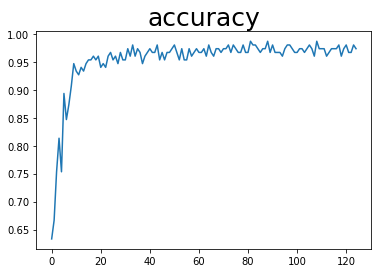

In [ ]:
plt.title("accuracy",fontsize=25,)
for i in tmp:
    acc_pic=np.append(acc_pic,np.array(i.history['accuracy']))
plt.plot(acc_pic)

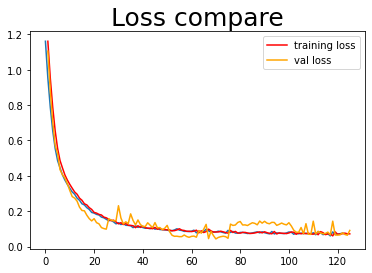

In [ ]:
loss_pic=np.array([])
acc_pic=np.array([])
val_pic=np.array([])
plt.title("Loss compare",fontsize=25,)
for i in res:
    loss_pic=np.append(loss_pic,np.array(i.history['loss']))
plt.plot(loss_pic)
for i in res:
    val_pic=np.append(val_pic,np.array(i.history['val_loss']))
ep=range(1,len(loss_pic)+1)
plt.plot(ep,loss_pic,"red",label="training loss")
plt.plot(ep,val_pic,"orange",label="val loss")
plt.legend()
plt.show()


In [ ]:
# use sklearn LogisticRegression
kf=KFold(n_splits=5,shuffle=True)
loss_avg=0
acc_score=0
recall_marco_score=0
recall_mirco_score=0
precision_macro_score=0
precision_micro_score=0
confusion_matrix_sum=np.empty((3,3))
confusion_matrix_sum[:]=0
time=1
for train_index,test_index in kf.split(data_x):
    x_train,x_test=data_x[train_index],data_x[test_index]
    y_train,y_test=data_y[train_index],data_y[test_index]
    clf = LogisticRegression(random_state=0,multi_class="multinomial",max_iter=10000).fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    y_test=y_test.astype('float64')
    y_pred=y_pred.astype('float64')
    cce = tf.keras.losses.CategoricalCrossentropy()
    loss_avg=loss_avg+cce(y_pred,y_test).numpy()
    acc_score=acc_score+accuracy_score(y_test,y_pred)
    recall_marco_score=recall_marco_score+recall_score(y_test, y_pred, average='macro')
    recall_mirco_score=recall_mirco_score+recall_score(y_test, y_pred, average='macro')
    precision_macro_score=precision_macro_score+precision_score(y_test, y_pred, average='macro')
    precision_micro_score=precision_micro_score+precision_score(y_test, y_pred, average='micro')
    confusion_matrix_sum=confusion_matrix_sum+confusion_matrix(y_test, y_pred)
    print('time:',time)
    time=time+1
    print('loss',cce(y_pred,y_test).numpy())
    print("recall_marco_score:",recall_score(y_test, y_pred, average='macro'))
    print("recall_mirco_score:",recall_score(y_test, y_pred, average='macro'))
    print("precision_macro_score:",precision_score(y_test, y_pred, average='macro'))
    print("precision_micro_score:",precision_score(y_test, y_pred, average='macro'))
    print("confusion_matrix:\n",confusion_matrix(y_test, y_pred))
    print('--------')
print('loss_avg:',loss_avg/5)
print("accuracy_score:",acc_score/5)
print("recall_marco_score_avg:",recall_marco_score/5)
print("recall_mirco_score_avg:",recall_mirco_score/5)
print("precision_macro_score_avg:",precision_macro_score/5)
print("precision_micro_score_avg:",precision_micro_score/5)
print("confusion_matrix_avg:\n",confusion_matrix_sum/5)

time: 1
loss 95.91508483886719
recall_marco_score: 0.9333333333333332
recall_mirco_score: 0.9333333333333332
precision_macro_score: 0.9555555555555556
precision_micro_score: 0.9555555555555556
confusion_matrix:
 [[ 7  0  0]
 [ 0 13  0]
 [ 0  2  8]]
--------
time: 2
loss 51.45832061767578
recall_marco_score: 1.0
recall_mirco_score: 1.0
precision_macro_score: 1.0
precision_micro_score: 1.0
confusion_matrix:
 [[18  0  0]
 [ 0  3  0]
 [ 0  0  9]]
--------
time: 3
loss 133.78932189941406
recall_marco_score: 0.9629629629629629
recall_mirco_score: 0.9629629629629629
precision_macro_score: 0.9803921568627452
precision_micro_score: 0.9803921568627452
confusion_matrix:
 [[ 5  0  0]
 [ 0  8  1]
 [ 0  0 16]]
--------
time: 4
loss 84.15727996826172
recall_marco_score: 0.9666666666666667
recall_mirco_score: 0.9666666666666667
precision_macro_score: 0.9666666666666667
precision_micro_score: 0.9666666666666667
confusion_matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
--------
time: 5
loss 83.96566772460

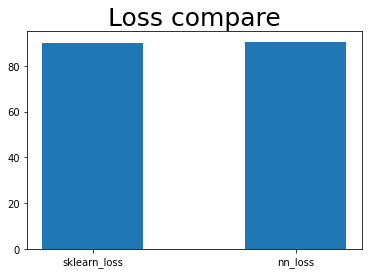

summary
use sklearn vs nn_network
loss_avg: 90.500634765625 89.85713500976563
recall_marco_score_avg: 0.9636324786324787 0.968148148148148
recall_mirco_score_avg: 0.9636324786324787 0.968148148148148
precision_macro_score_avg: 0.9696296296296296 0.970999066293184
precision_mirco_score_avg: 0.9666666666666666 0.9666666666666666
confusion_matrix_avg:
 [[10.   0.   0. ]
 [ 0.   9.2  0.8]
 [ 0.   0.2  9.8]] 
vs [[10.   0.   0. ]
 [ 0.   9.4  0.6]
 [ 0.   0.4  9.6]]
overall use sklearn's LogisticRegression is better


In [ ]:
# summary
plt.title("Loss compare",fontsize=25,)
plt.bar(['sklearn_loss','nn_loss'],[loss_avg/5,nn_loss/5],width=0.5,)
plt.show()
print('summary')
print('use sklearn vs nn_network')
print("loss_avg:",nn_loss/5,loss_avg/5)
print("recall_marco_score_avg:",nn_recall_marco_score/5,recall_marco_score/5)
print("recall_mirco_score_avg:",nn_recall_mirco_score/5,recall_mirco_score/5)
print("precision_macro_score_avg:",nn_precision_macro_score/5,precision_macro_score/5)
print("precision_mirco_score_avg:",nn_precision_micro_score/5,precision_micro_score/5)
print("confusion_matrix_avg:\n",nn_confusion_matrix_sum/5,'\nvs',confusion_matrix_sum/5)
print("overall use sklearn's LogisticRegression is better")